In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset from a CSV file
df=pd.read_csv('Churn.csv')

In [3]:
# Display the first few rows of the dataset to understand its structure
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# Check the shape of the dataset (rows, columns)
df.shape

(7043, 21)

In [5]:
# Get information about the dataset, including column types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# Check for missing values in each column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
# Remove duplicate rows if any exist
df.drop_duplicates(inplace=True)

In [8]:
# Verify the shape after removing duplicates
df.shape

(7043, 21)

In [9]:
# Generate descriptive statistics for numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# Generate descriptive statistics for categorical columns
df.describe(include='object').T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


###  Insights from Data Overview:
- Average `tenure` is lower for churned customers (~18 months) vs not churned (~33 months).
- `TotalCharges` had missing/empty entries (were filled from previous values).
- Churn rate in the dataset is approximately **27.5%**, which is significant.

In [11]:
# Identify rows with missing or empty values in 'TotalCharges'
l1 = [len(i.split()) for i in df['TotalCharges']]
l2 = [i for i in range(len(l1)) if l1[i] != 1]
print('Index Positions with empty spaces : ',*l2)

Index Positions with empty spaces :  488 753 936 1082 1340 3331 3826 4380 5218 6670 6754


In [12]:
# Fill missing values in 'TotalCharges' with the previous value
for i in l2:
    df.loc[i,'TotalCharges'] = df.loc[(i-1),'TotalCharges']

In [13]:
# Convert 'TotalCharges' to float type for numerical analysis 
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.drop(columns = ['customerID'], inplace = True)

In [14]:
labelencoder=LabelEncoder()

In [15]:
# Create a copy of the original dataframe to avoid modifying it directly
df1=df.copy(deep=True)

In [16]:
# Identify categorical columns that need encoding
data_object = [i for i in list(df.columns) if i not in list(df.describe().columns)]

In [17]:
for i in data_object :
    df1[i] = labelencoder.fit_transform(df1[i])
    print(i,' : ',df1[i].unique(),' = ',labelencoder.inverse_transform(df1[i].unique()))

gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [18]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.504756,0.500013,0.00,0.000,1.00,1.00,1.00
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.000,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.000,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.000,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.000,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.000,1.00,1.00,1.00
MultipleLines,7043.0,0.940508,0.948554,0.00,0.000,1.00,2.00,2.00
InternetService,7043.0,0.872923,0.737796,0.00,0.000,1.00,1.00,2.00
OnlineSecurity,7043.0,0.790004,0.859848,0.00,0.000,1.00,2.00,2.00
OnlineBackup,7043.0,0.906432,0.880162,0.00,0.000,1.00,2.00,2.00


In [19]:
churn=df1[df1['Churn']==1].describe().T

In [20]:
not_churn=df1[df1['Churn']==0].describe().T

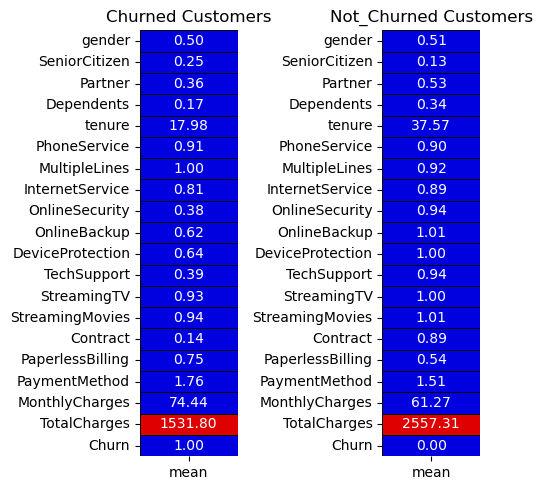

In [21]:
# Visualize the mean values for churned and non-churned customers
colors = ["#0101DF", "#DF0101"]
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers');

plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers');
fig.tight_layout()

### 📊 Insights from Visuals:
- Churned customers tend to have **higher `MonthlyCharges`** but **lower `TotalCharges`**, indicating **shorter service durations**.
- `Tenure` is a strong indicator of churn — customers with low tenure are more likely to churn.
- Distribution of features like `MonthlyCharges` is **right-skewed** (most customers pay lower charges, few pay high).

In [22]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

 ##### Comment: Class imbalance exists (27.5% churn rate). Note that models may need balancing techniques (e.g., SMOTE, class weights).
 ##### Insight: The imbalance suggests prioritizing metrics like precision/recall/F1 over accuracy for model evaluation.

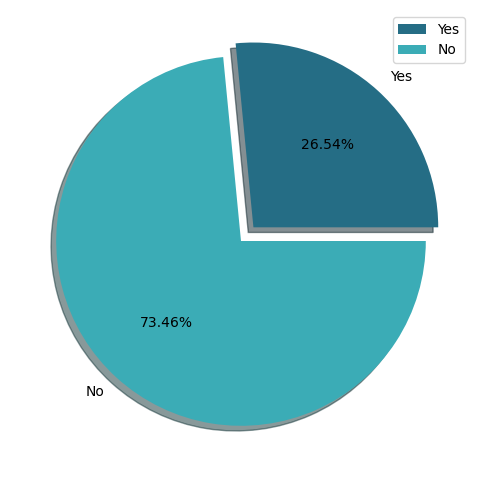

In [23]:
plt.figure(figsize= (10, 6))
data_pie  = [1869 , 5174]
labels = ["Yes", "No"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

###  Business Implications:
- Target **new customers** (short tenure) with better onboarding/retention strategies to reduce churn.
- Analyze plans with high `MonthlyCharges` — churn is higher there, maybe due to dissatisfaction.
- `Tenure` and `MonthlyCharges` are potentially strong features for churn prediction models.

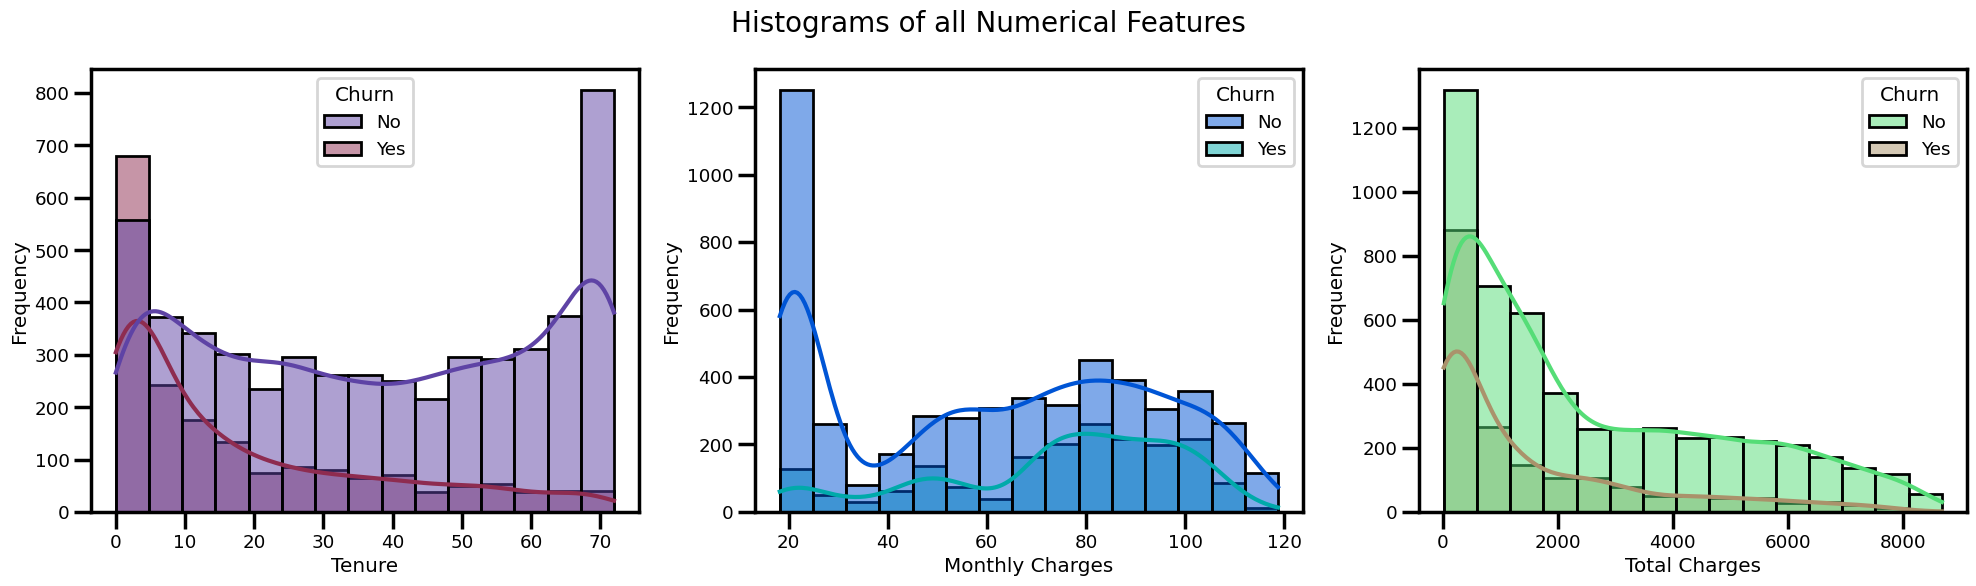

In [24]:

sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

ax1 = sns.histplot(x = df['tenure'],color= 'teal', hue= df['Churn'], ax= ax[0], bins= 15, kde= True, palette= 'twilight')
ax1.set(xlabel= 'Tenure', ylabel= 'Frequency')

ax2 = sns.histplot(x = df['MonthlyCharges'], color= 'teal', hue= df['Churn'], ax= ax[1], bins= 15, kde= True, palette= 'winter')
ax2.set(xlabel= 'Monthly Charges', ylabel= 'Frequency')

ax3 = sns.histplot(x = df['TotalCharges'], color= 'teal', hue= df['Churn'], ax= ax[2], bins= 15, kde= True, palette= 'terrain')
ax3.set(xlabel= 'Total Charges', ylabel= 'Frequency')

plt.tight_layout()
plt.show()

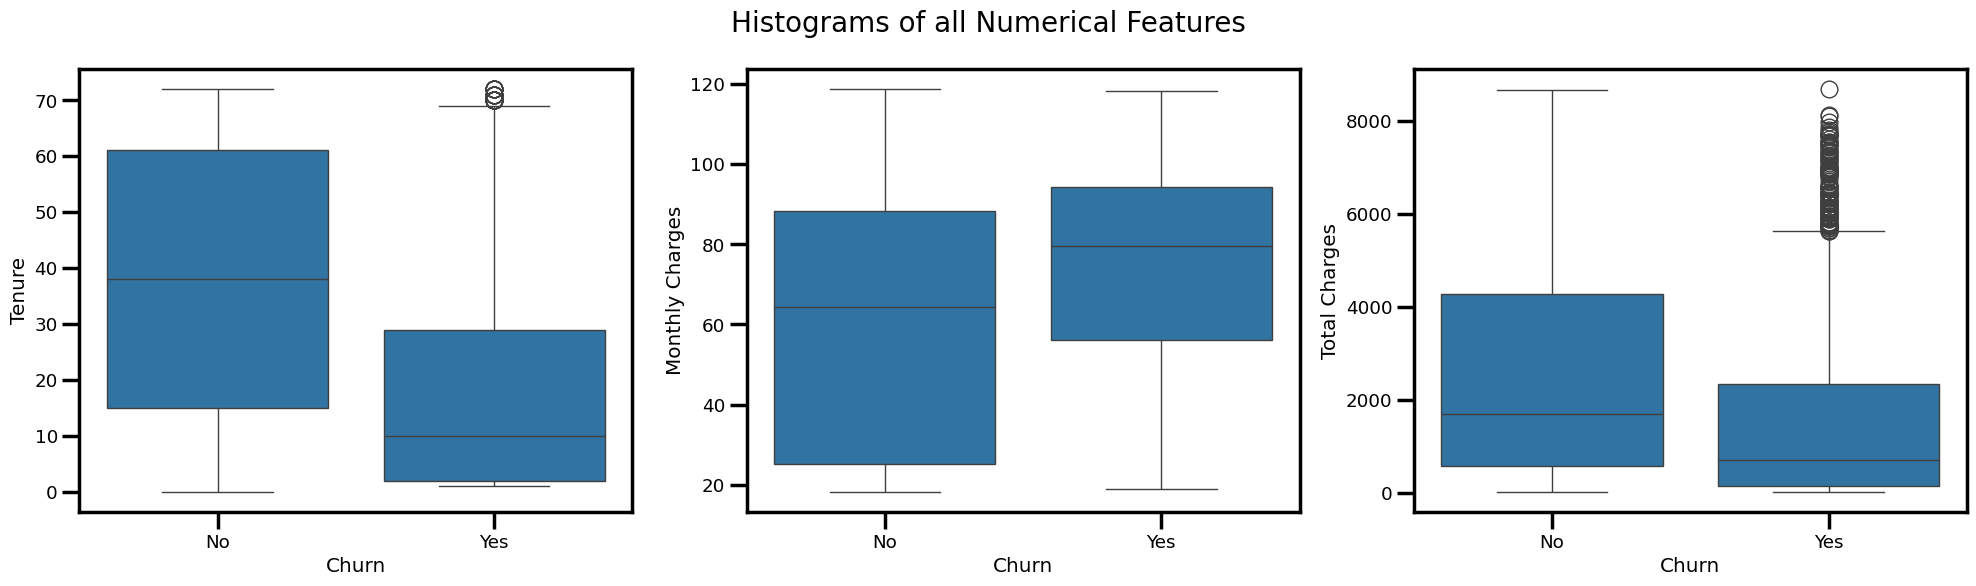

In [43]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

ax1 = sns.boxplot(y = df['tenure'], x= df['Churn'], ax= ax[0]) 
ax1.set(xlabel= 'Churn', ylabel= 'Tenure')

ax2 = sns.boxplot(y = df['MonthlyCharges'], x= df['Churn'],  ax= ax[1])
ax2.set(xlabel= 'Churn', ylabel= 'Monthly Charges')

ax3 = sns.boxplot(y = df['TotalCharges'], x= df['Churn'], ax= ax[2]) 
ax3.set(xlabel= 'Churn', ylabel= 'Total Charges')

plt.tight_layout()
plt.show()

In [44]:
numerical=df.describe().columns

In [45]:
numerical

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

<Axes: >

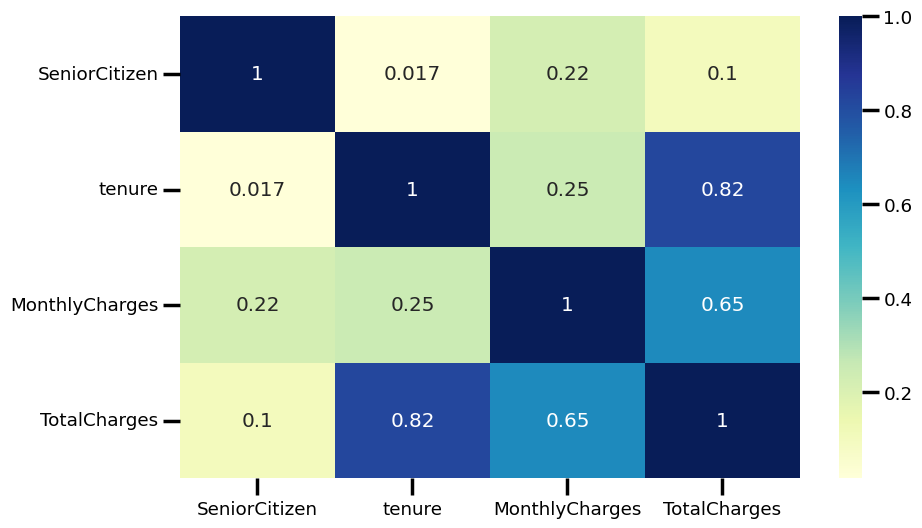

In [46]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical].corr(), cmap = 'YlGnBu', annot = True)

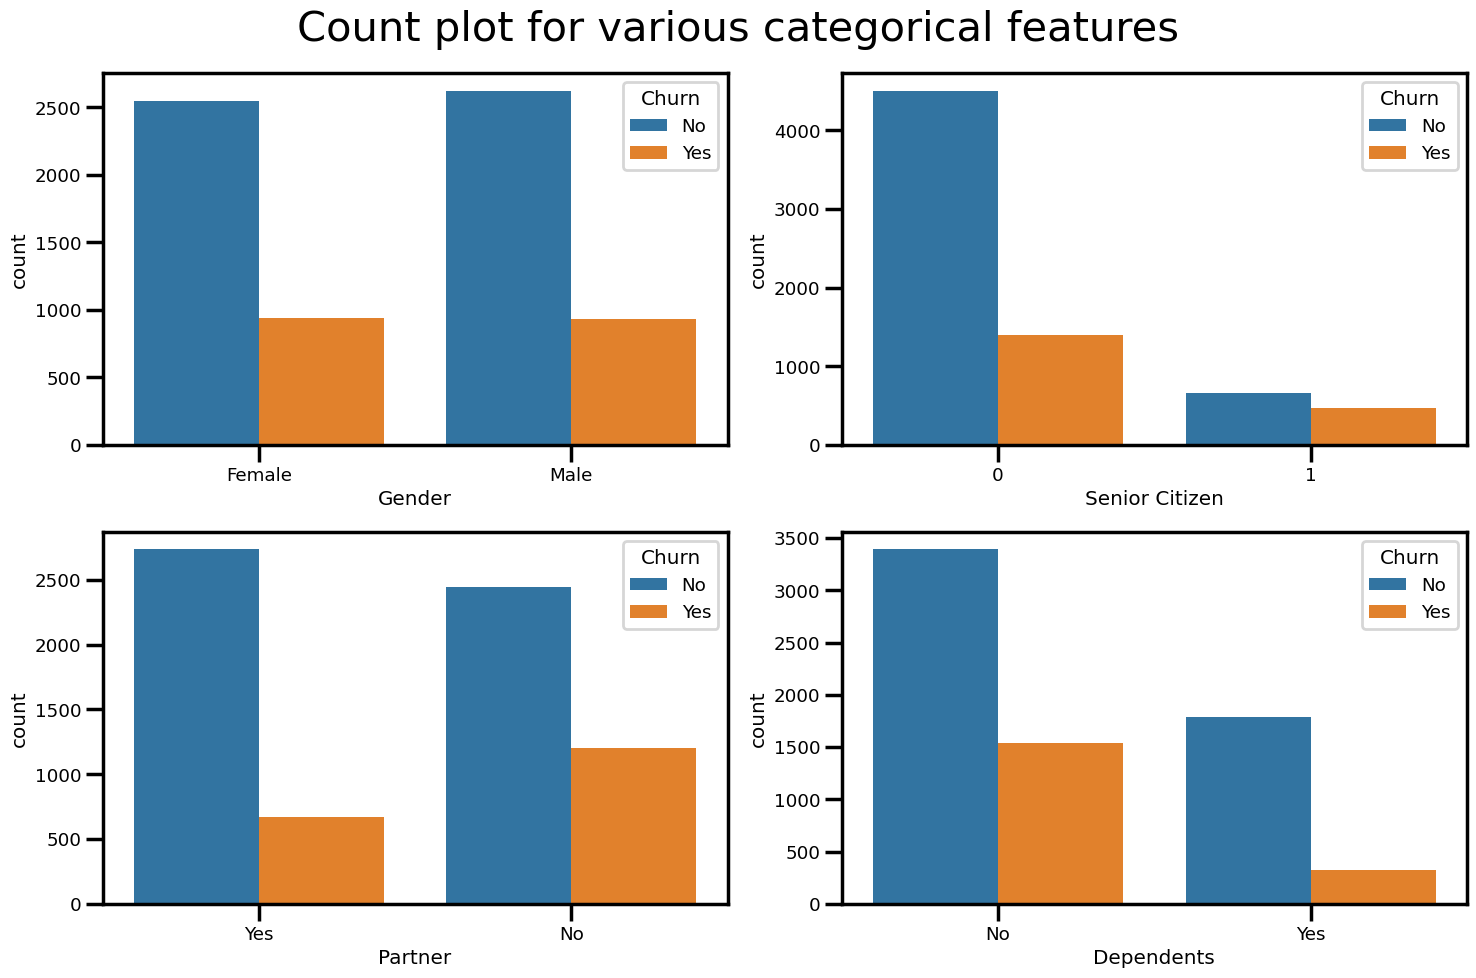

In [47]:
ig, ax = plt.subplots(2, 2, figsize = (15, 10))
plt.suptitle('Count plot for various categorical features', fontsize = 30)

ax1 = sns.countplot(x ='gender', data= df, hue= 'Churn', ax= ax[0, 0])
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='SeniorCitizen', data= df, hue= 'Churn', ax= ax[0, 1])
ax2.set(xlabel = 'Senior Citizen')

ax3 = sns.countplot(x ='Partner', data= df, hue= 'Churn', ax= ax[1, 0])
ax3.set(xlabel = 'Partner')

ax4 = sns.countplot(x ='Dependents', data= df, hue= 'Churn', ax= ax[1, 1])
ax4.set(xlabel = 'Dependents')

plt.tight_layout()
plt.show()

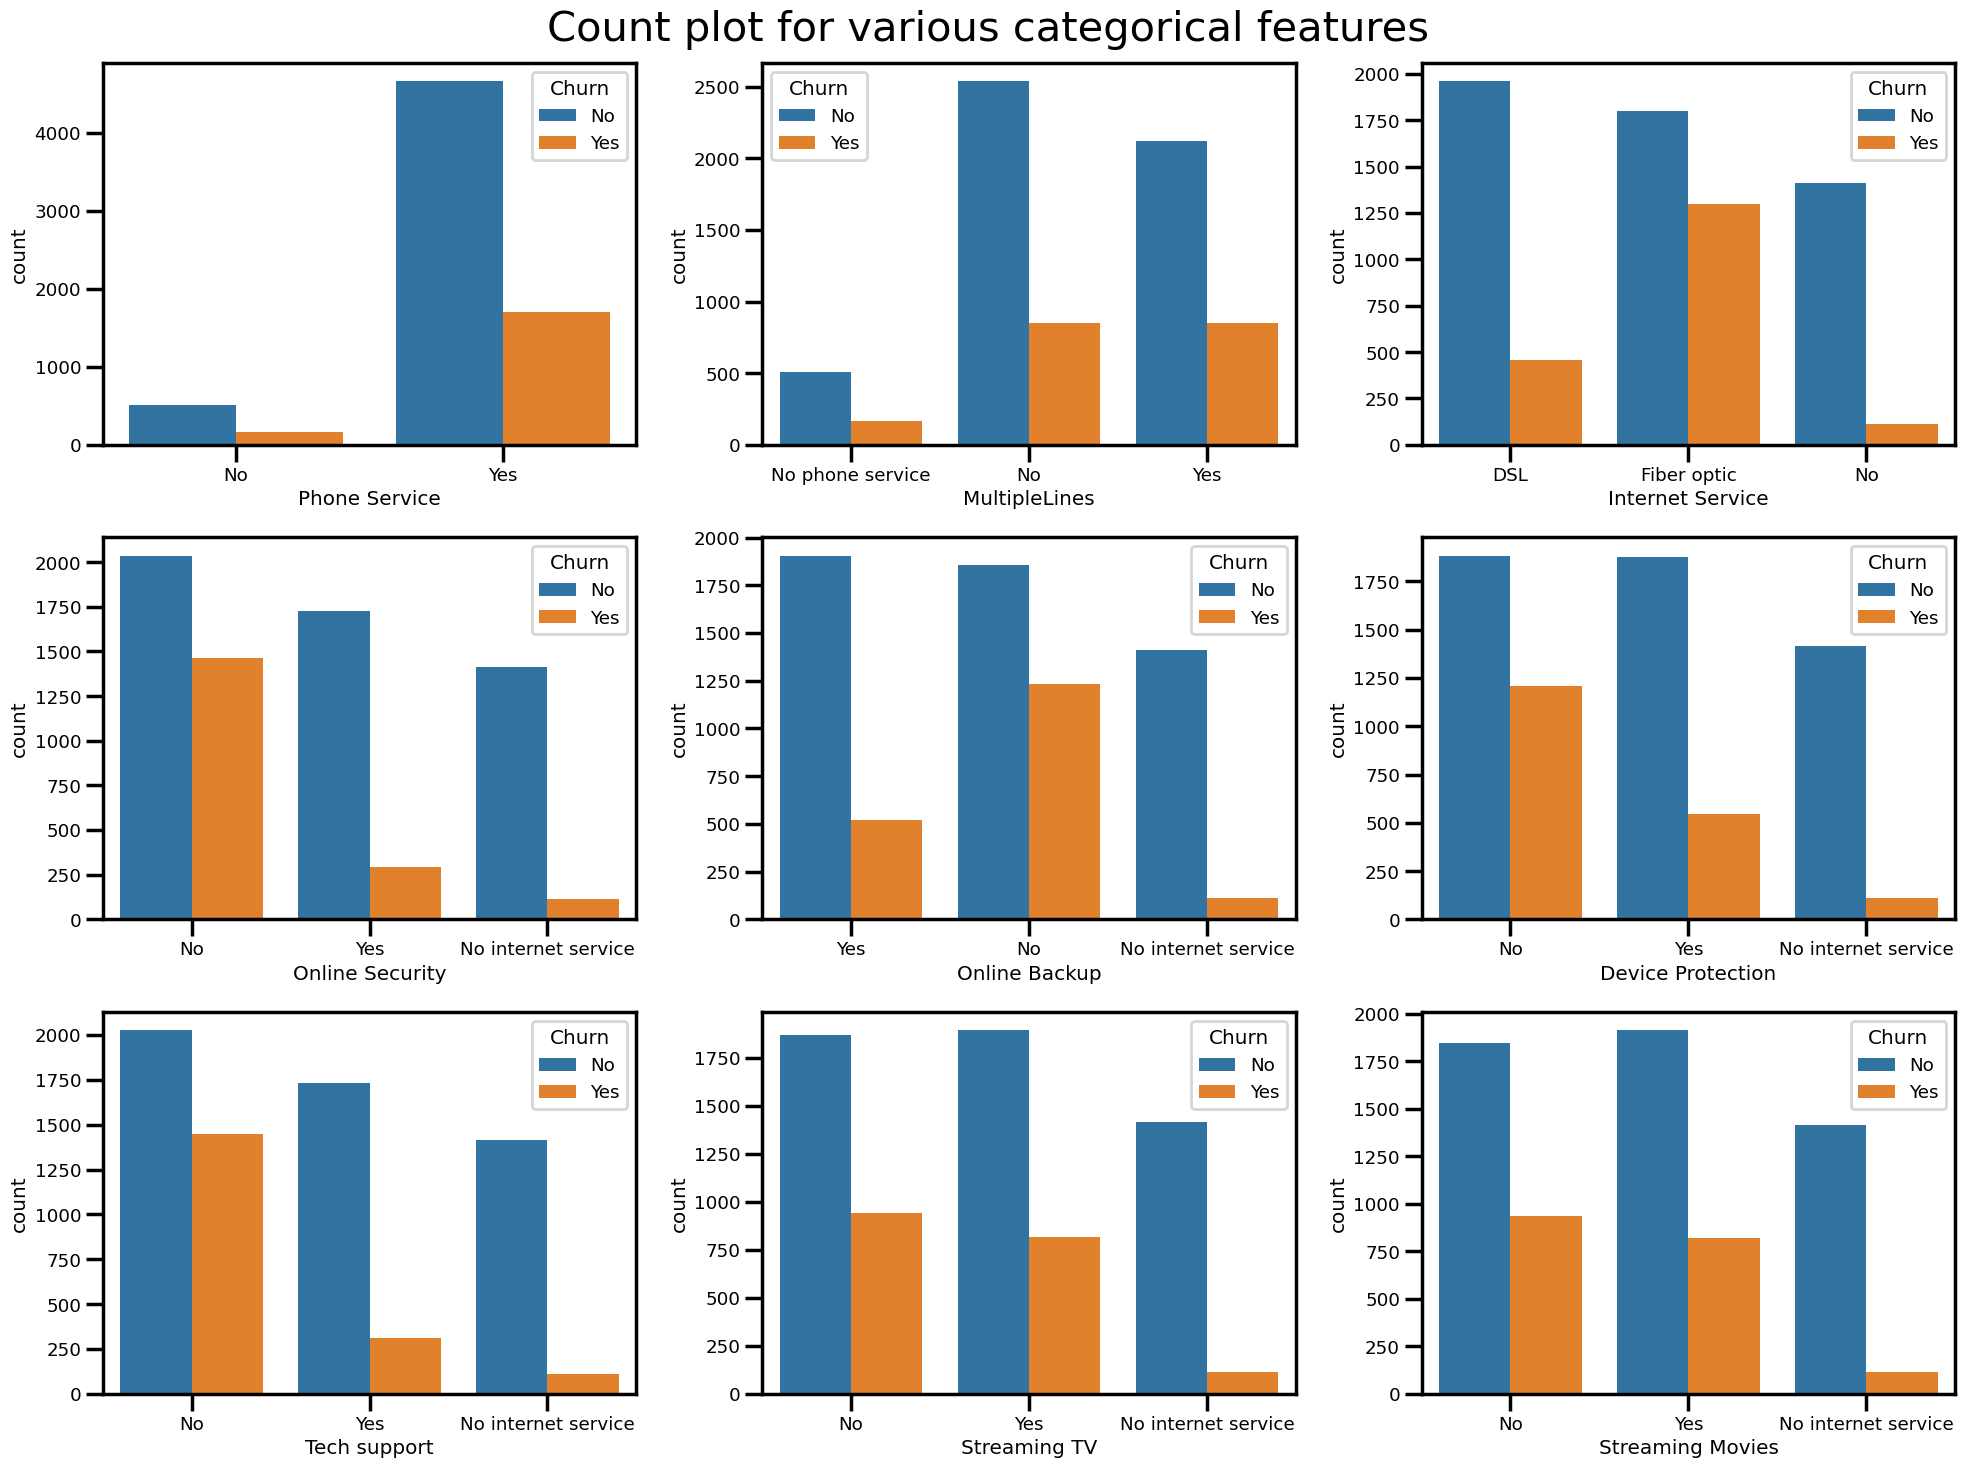

In [48]:
fig, ax = plt.subplots(3, 3, figsize = (20, 15))

plt.suptitle('Count plot for various categorical features', fontsize = 30)

ax1 = sns.countplot(x ='PhoneService', data= df, hue= 'Churn', ax= ax[0, 0])
ax1.set(xlabel = 'Phone Service')

ax2 = sns.countplot(x ='MultipleLines', data= df, hue= 'Churn', ax= ax[0, 1])
ax2.set(xlabel = 'MultipleLines')

ax3 = sns.countplot(x ='InternetService', data= df, hue= 'Churn', ax= ax[0, 2])
ax3.set(xlabel = 'Internet Service')

ax4 = sns.countplot(x ='OnlineSecurity', data= df, hue= 'Churn', ax= ax[1, 0])
ax4.set(xlabel = 'Online Security')

ax5 = sns.countplot(x ='OnlineBackup', data= df, hue= 'Churn', ax= ax[1, 1])
ax5.set(xlabel = 'Online Backup')

ax6 = sns.countplot(x ='DeviceProtection', data= df, hue= 'Churn', ax= ax[1, 2])
ax6.set(xlabel = 'Device Protection')

ax7 = sns.countplot(x ='TechSupport', data= df, hue= 'Churn', ax= ax[2, 0])
ax7.set(xlabel = 'Tech support')

ax8 = sns.countplot(x ='StreamingTV', data= df, hue= 'Churn', ax= ax[2, 1])
ax8.set(xlabel = 'Streaming TV')

ax9 = sns.countplot(x ='StreamingMovies', data= df, hue= 'Churn', ax= ax[2, 2])
ax9.set(xlabel = 'Streaming Movies')

plt.tight_layout()
plt.show()

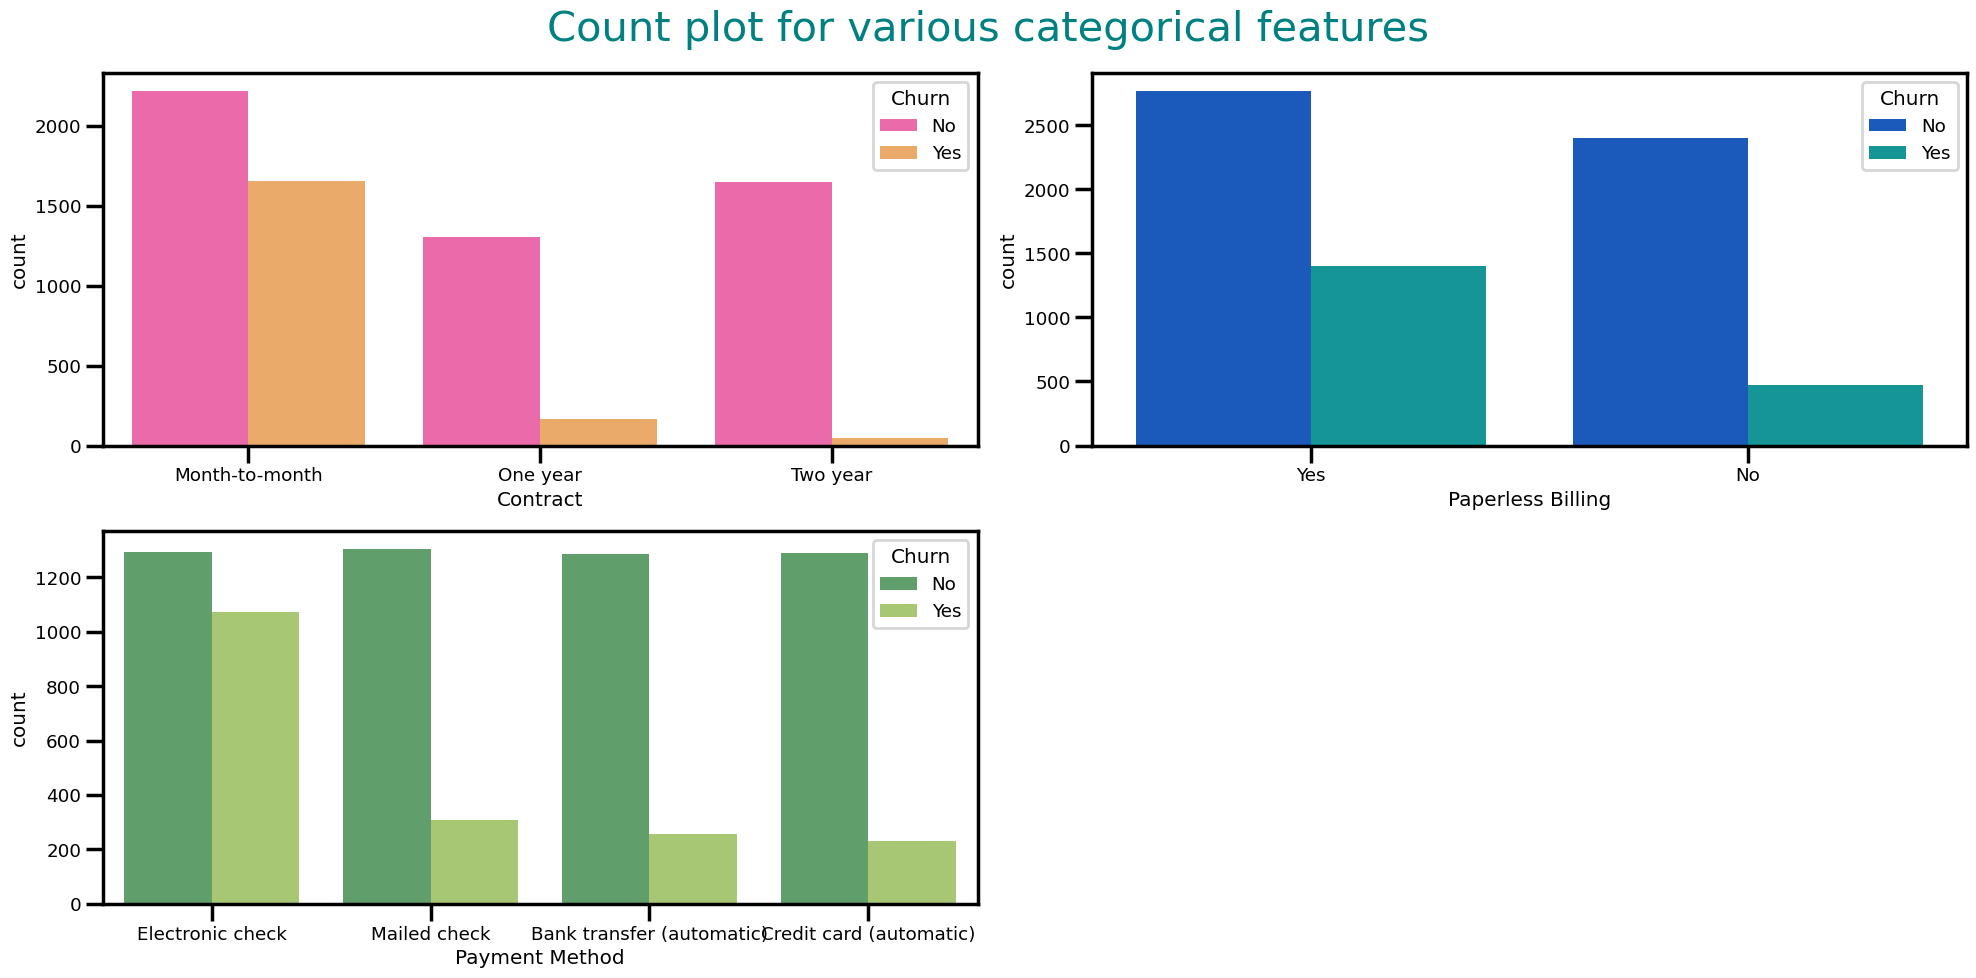

In [49]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax[1, 1].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='Contract', data= df, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Contract')

ax2 = sns.countplot(x ='PaperlessBilling', data= df, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Paperless Billing')

ax3 = sns.countplot(x ='PaymentMethod', data= df, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Payment Method')

plt.tight_layout()
plt.show()

###  **Actionable Recommendations**
1. **Target High-Risk Groups**: Customers with Fiber optic Internet, month-to-month contracts, and no Online Security.
2. **Personalize Retention**: Offer discounts for long-term contracts or bundled services to high MonthlyCharges customers.
3. **Improve Onboarding**: Address pain points for new customers (tenure < 6 months) with proactive support.